In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('gold_price_data.csv')



In [5]:
#ensure the 'date' column is a datetime object
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
#Drop records before 1979 , since full data is not available for thoseyears
df = df[df['Date'] >= '1979-01-01']


In [11]:
#Filter data for 1st day of the month
df = df[df['Date'].dt.day == 1]

In [15]:
df.set_index('Date',inplace=True)
print(df.head())
print(df.tail())

             Value
Date              
1979-01-01  226.00
1979-02-01  229.35
1979-03-01  248.80
1979-05-01  247.30
1979-06-01  275.10
              Value
Date               
2019-07-01  1390.10
2019-08-01  1406.80
2019-10-01  1473.45
2019-11-01  1508.80
2020-01-01  1514.75


<Axes: xlabel='Date', ylabel='Value'>

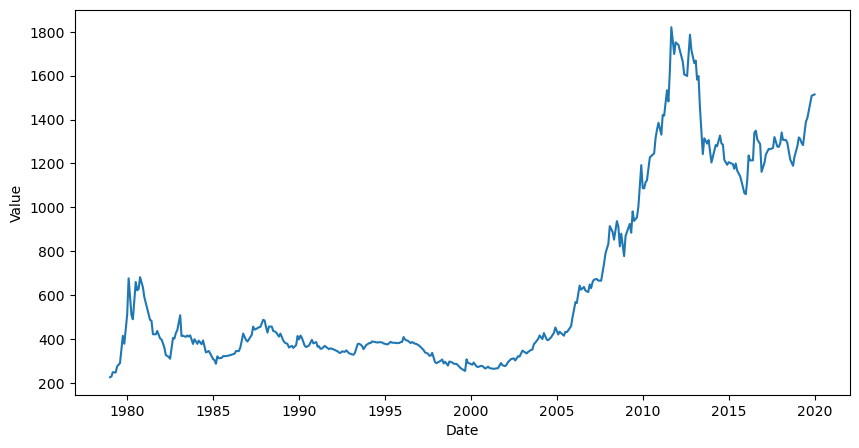

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.Value)

In [17]:
df

,Value
Date,
1979-01-01,226.00
1979-02-01,229.35
1979-03-01,248.80
1979-05-01,247.30
1979-06-01,275.10
...,...
2019-07-01,1390.10
2019-08-01,1406.80
2019-10-01,1473.45


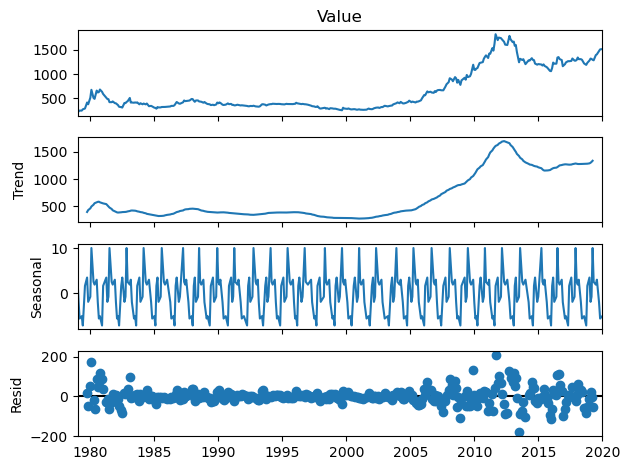

In [23]:
#Check  further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.Value,period=12)
fig = decomposition.plot()

In [25]:
#Calculate and plot rolling mean  and standard deviation for 12 months
df['rollMean'] = df.Value.rolling(window=12).mean()
df['rollStd'] = df.Value.rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Value'>

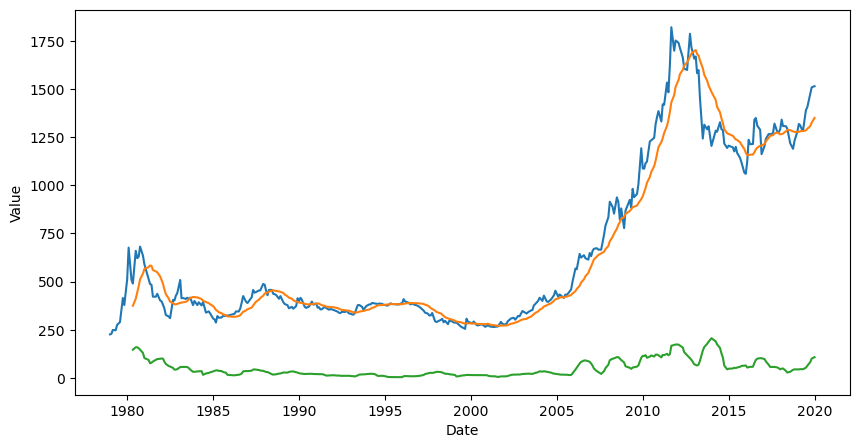

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.Value)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)